# Previsão de Kilometragem mensal 

## Importação de pacotes

In [1]:
import pandas as pd
#from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set_theme(color_codes=True)

## Ler multiplas abas do excel e fazer o bind rows

In [2]:
def read_excel_sheets(xls_path):
    """Read all sheets of an Excel workbook and return a single DataFrame"""
    print(f'Loading {xls_path} into pandas')
    xl = pd.ExcelFile(xls_path)
    df = pd.DataFrame()
    columns = None
    for idx, name in enumerate(xl.sheet_names):
        print(f'Reading sheet #{idx}: {name}')
        sheet = xl.parse(name)
        if idx == 0:
            # Save column names from the first sheet to match for append
            columns = sheet.columns
        sheet.columns = columns
        # Assume index of existing data frame when appended
        df = df.append(sheet, ignore_index=True)
    return df

In [3]:
df = read_excel_sheets('PREVISAO_KM.xlsx')

Loading PREVISAO_KM.xlsx into pandas
Reading sheet #0: CAP1
Reading sheet #1: CAP7
Reading sheet #2: LIRA11
Reading sheet #3: LIRA13
Reading sheet #4: RLC16
Reading sheet #5: WS4
Reading sheet #6: RS16


## Investigar os dados

In [4]:
df.head()

,08/2021,G,QUILOMETRAGEM,ANO,EQUIPE,TOT,01,02,03,04,...,22,23,24,25,26,27,28,29,30,31
0,14,1.0,BANDEIRANTE,1991.0,HOT AP HOT,379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,672,1.0,O 500 M E3,2008.0,HOT FT HOT,4072,NaN,NaN,595.0,NaN,...,NaN,NaN,614.0,NaN,NaN,NaN,NaN,NaN,651.0,NaN
2,1240,1.0,313 CDI E3,2011.0,HOT FT HOT,1845,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,535.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1302,1.0,LO 916 E5,2013.0,HOT FT HOT,6510,NaN,NaN,NaN,658.0,...,NaN,520.0,NaN,687.0,NaN,NaN,295.0,NaN,656.0,NaN
4,2475,1.0,PALIO 1.0,2010.0,HOT AD HOT,988,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['08/2021', 'G', 'QUILOMETRAGEM', 'ANO', 'EQUIPE', 'TOT', '01', '02',
       '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '27', '28', '29', '30', '31'],
      dtype='object')

In [6]:
df.shape

(662, 37)

## Subseting dados

In [7]:
equipe = ['CA1 FT HOT','VENDA MM','HOT FT HOT','HOT MT HOT','HOT MT MOM','HOT UB HOT','MOM UB MOM']

In [8]:
df = df[df.EQUIPE.isin(equipe)]

In [9]:
df.EQUIPE.unique()

array(['HOT FT HOT', 'HOT MT MOM', 'HOT MT HOT', 'HOT UB HOT', 'VENDA MM',
       'MOM UB MOM'], dtype=object)

## Transformar os dados (pivot wide to longer)

In [10]:
df = df.loc[:,'01':'31'] #Returns a new dataframe with columns a,b and c

In [11]:
df.tail()

,01,02,03,04,05,06,07,08,09,10,...,22,23,24,25,26,27,28,29,30,31
653,NaN,435.0,265.0,97.0,165.0,253.0,476.0,336.0,NaN,336.0,...,NaN,372.0,NaN,433.0,370.0,119.0,342.0,NaN,NaN,NaN
654,567.0,NaN,478.0,NaN,NaN,947.0,311.0,NaN,321.0,259.0,...,NaN,492.0,NaN,661.0,173.0,268.0,NaN,NaN,580.0,NaN
655,NaN,384.0,192.0,207.0,177.0,466.0,NaN,353.0,147.0,167.0,...,NaN,587.0,156.0,70.0,193.0,177.0,179.0,NaN,377.0,NaN
657,NaN,NaN,NaN,607.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,829.0,269.0,357.0,154.0,151.0,NaN,442.0,NaN,NaN
658,NaN,512.0,NaN,457.0,NaN,649.0,NaN,NaN,563.0,NaN,...,NaN,594.0,NaN,650.0,NaN,NaN,480.0,NaN,NaN,NaN


In [12]:
#df.to_excel('maycon.xlsx')

In [13]:
df = df.unstack().reset_index()

In [14]:
df.tail()

,level_0,level_1,0
9791,31,653,NaN
9792,31,654,NaN
9793,31,655,NaN
9794,31,657,NaN
9795,31,658,NaN


In [15]:
df.columns = [['DIA','idx','KM']]

In [16]:
df['KM'].isna().sum()

KM    4938
dtype: int64

In [17]:
df['DIA'].isna().sum()

DIA    0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df['KM'].isna().sum()

KM    0
dtype: int64

## Renomear as colunas

In [20]:
df = df[['DIA','KM']]

In [21]:
df.head(10)

,DIA,KM
7,01,377.0
30,01,130.0
31,01,705.0
34,01,286.0
35,01,518.0
39,01,459.0
40,01,334.0
43,01,231.0
44,01,182.0
45,01,198.0


## Histograma dos kms

<AxesSubplot:ylabel='Count'>

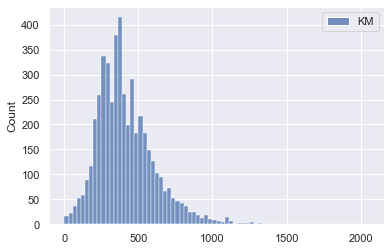

In [22]:
sns.histplot(data=df)

In [23]:
df.describe().round()

,KM
count,4858.0
mean,417.0
std,198.0
min,1.0
25%,280.0
50%,379.0
75%,518.0
max,2055.0


## Group by por dia 

In [24]:
df.columns = ['DIA', 'KM']

In [25]:
df = df.groupby(['DIA']).sum()

In [26]:
df.tail()

,KM
DIA,
26,80774.0
27,78071.0
28,49989.0
29,28408.0
30,77270.0


## Cumsum 

In [27]:
df = df.cumsum()

In [28]:
df = df.reset_index()

In [29]:
df.dtypes

DIA     object
KM     float64
dtype: object

In [30]:
df.head()

,DIA,KM
0,01,30631.0
1,02,105304.0
2,03,183948.0
3,04,258182.0
4,05,346360.0


## Drop last row by selecting all rows except last row

In [31]:
df = df.iloc[:-10 , :]

In [32]:
df = df[['DIA','KM']]

In [33]:
df.tail()

,DIA,KM
15,16,1052827.0
16,17,1138202.0
17,18,1220316.0
18,19,1303297.0
19,20,1383116.0


## Mudar o tipo de dados

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DIA     20 non-null     object 
 1   KM      20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [35]:
df = df.astype({"DIA": int, "KM": int})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   DIA     20 non-null     int32
 1   KM      20 non-null     int32
dtypes: int32(2)
memory usage: 288.0 bytes


In [37]:
#df= pd.read_excel('km-python.xlsx')

## Criação do modelo

In [38]:
x = df[['DIA']].to_numpy()
y = df[['KM']].to_numpy()

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression()

In [41]:
model = LinearRegression().fit(x, y)

## Avaliação do modelo

In [42]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope: ', model.coef_)

coefficient of determination: 0.9974856033775721
intercept: [-21291.95263158]
slope:  [[69115.92406015]]


In [43]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[  47823.97142857]
 [ 116939.89548872]
 [ 186055.81954887]
 [ 255171.74360902]
 [ 324287.66766917]
 [ 393403.59172932]
 [ 462519.51578947]
 [ 531635.43984962]
 [ 600751.36390977]
 [ 669867.28796992]
 [ 738983.21203008]
 [ 808099.13609023]
 [ 877215.06015038]
 [ 946330.98421053]
 [1015446.90827068]
 [1084562.83233083]
 [1153678.75639098]
 [1222794.68045113]
 [1291910.60451128]
 [1361026.52857143]]


## Visualizando o modelo de regressão linear

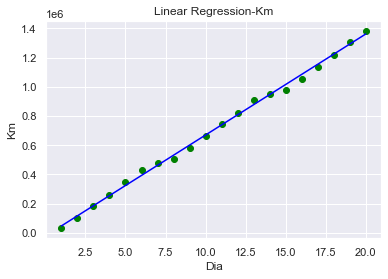

In [44]:
plt.scatter(x,y,color='green')
plt.plot(x, model.predict(x),color='blue')
plt.title('Linear Regression-Km')
plt.xlabel('Dia')
plt.ylabel('Km')
plt.grid(True)
plt.xticks()
plt.yticks()
plt.show()


In [45]:
#sns.lmplot(x="DIA", y="KM", data=df,
#           order=0, ci=True, scatter_kws={"s": 80});

## Check residuals

<AxesSubplot:xlabel='DIA', ylabel='KM'>

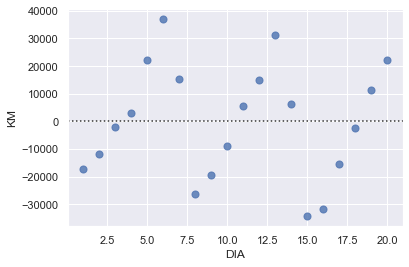

In [46]:
sns.residplot(x="DIA", y="KM", data=df,
           order=0, scatter_kws={"s": 50})

## Fazer Previsão com novos dados

In [47]:
x_new = np.arange(21,32).reshape((-1, 1))

In [48]:
print(x_new)

[[21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]]


In [49]:
x_new.shape

(11, 1)

In [50]:
y_new = model.predict(x_new)
print(y_new.round(2))

[[1430142.45]
 [1499258.38]
 [1568374.3 ]
 [1637490.22]
 [1706606.15]
 [1775722.07]
 [1844838.  ]
 [1913953.92]
 [1983069.85]
 [2052185.77]
 [2121301.69]]


In [51]:
y_upper = y_new + (y_new*0.05)
y_lower = y_new - (y_new*0.05)

print(y_lower.round(2))
print(y_new)
print(y_upper.round(2))

[[1358635.33]
 [1424295.46]
 [1489955.59]
 [1555615.71]
 [1621275.84]
 [1686935.97]
 [1752596.1 ]
 [1818256.23]
 [1883916.35]
 [1949576.48]
 [2015236.61]]
[[1430142.45263158]
 [1499258.37669173]
 [1568374.30075188]
 [1637490.22481203]
 [1706606.14887218]
 [1775722.07293233]
 [1844837.99699248]
 [1913953.92105263]
 [1983069.84511278]
 [2052185.76917293]
 [2121301.69323308]]
[[1501649.58]
 [1574221.3 ]
 [1646793.02]
 [1719364.74]
 [1791936.46]
 [1864508.18]
 [1937079.9 ]
 [2009651.62]
 [2082223.34]
 [2154795.06]
 [2227366.78]]


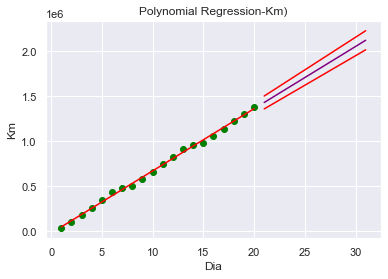

In [52]:
#Visualising the pollynomial regression model results
X = x
plt.scatter(X,y,color='green')
plt.plot(X,model.predict(X),color='red')
plt.title('Polynomial Regression-Km)')
plt.xlabel('Dia')
plt.ylabel('Km')
plt.grid(True)
plt.plot(x_new,y_upper,color='red')
plt.plot(x_new,y_lower,color='red')
#plt.fill_between(x_new, y_lower, y_upper, edgecolor='g', facecolor='g', alpha=0.3)
plt.plot(x_new,model.predict(x_new),color='purple')
plt.show()

In [57]:
km = float(y_upper[-1:])
km_target = float(y_new[-1:])

In [58]:
print("A previsão de Km mensal será de {:.2f}".format(km))

A previsão de Km mensal será de 2227366.78
